# _Restaurant Recommendation System_
## Prepare import

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from tabulate import tabulate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
ratings_data = pd.read_csv('GoogleReview_data_cleaned.csv', low_memory = False)
print("Review data:", ratings_data.shape)
print("\nCheck NULL values in Reviews:\n-----------------------------")
print(ratings_data.isnull().sum())
print("-----------------------------")
ratings_data.head()

Review data: (222020, 5)

Check NULL values in Reviews:
-----------------------------
Author        0
Rating        0
Review        0
Restaurant    0
Location      0
dtype: int64
-----------------------------


,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


In [5]:
restaurants_review_data = ratings_data.copy()
restaurants_review_data.head()

,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


## Load Data
### GoogleReview
#### View Sample, Check Null Data For Review

## Data Preprocessing

In [6]:
# Consider only those author who have rated more than 10 restaurants and those restaurant which are having at least 20 ratings
x = restaurants_review_data.groupby('Author').count()['Rating'] > 10
quality_author  = x[x].index

restaurants_review_data = restaurants_review_data[restaurants_review_data['Author'].isin(quality_author)]

y = restaurants_review_data.groupby('Restaurant')['Rating'].count() >= 20
famous_restaurants = y[y].index

restaurants_review_data = restaurants_review_data[restaurants_review_data['Restaurant'].isin(famous_restaurants)]

# due to we filter out the author who only have rated more than 10 restaurants and those restaurant which 
restaurants_review_data = restaurants_review_data.reset_index()
# drop index column, axis = 0 indicates rows, 1 indicates columns
restaurants_review_data = restaurants_review_data.drop(['index'], axis=1)
restaurants_review_data.shape

# Get the restaurants in this dataset without duplicates
restaurants_data = restaurants_review_data.drop_duplicates(subset=['Restaurant'])
# no. of restaurants = 420
restaurants_data = restaurants_data.reset_index() 

# print()

# Get the authors in this dataset without duplicates
authors_data = restaurants_review_data.drop_duplicates(subset=['Author'])
# No. of authors in this dataset = 253
authors_data.shape


(1321, 5)

## Data Visualization

### Number of Restaurants By City

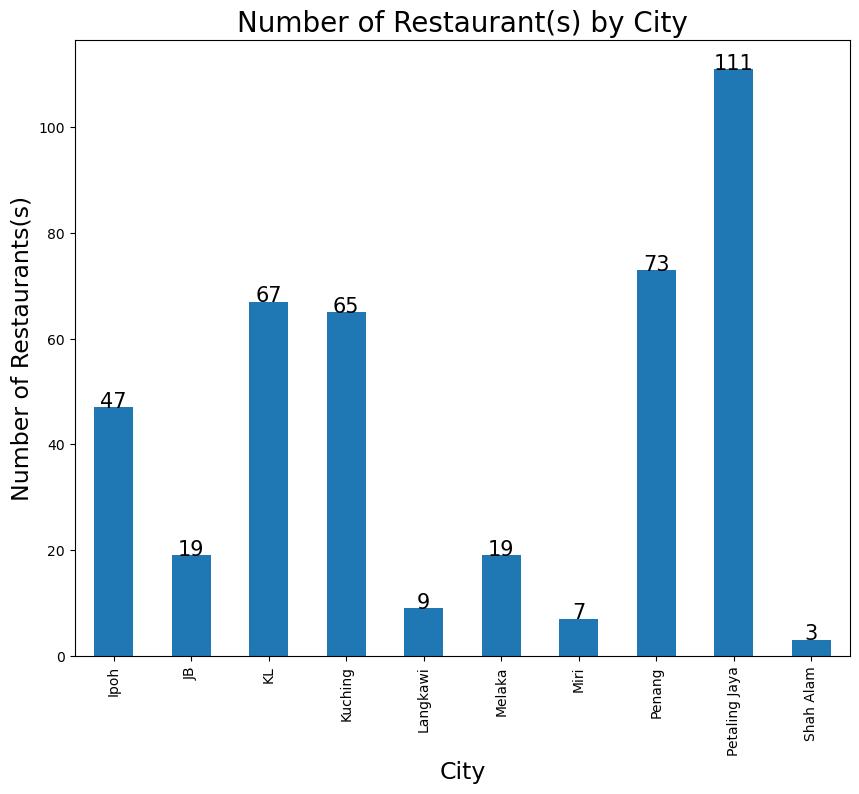

In [7]:
state_counts = restaurants_data.groupby('Location')['Restaurant'].count()
state_counts.plot(kind='bar', figsize = (10, 8))
plt.title('Number of Restaurant(s) by City', fontsize = 20)
plt.xlabel('City', fontsize = 17)
plt.ylabel('Number of Restaurants(s)', fontsize = 17)
for i in range(len(state_counts)):
    plt.text(x=i, y = state_counts.iloc[i], s = state_counts.iloc[i], ha = 'center', fontsize = 15)
plt.show()

# Content-Based Filtering Recommendation System

### Building Restaurant-Author Interactions Matrix


In [8]:
# use pivot_table because in our datasets, a restaurant have multiple ratings, so we cannot just calculate similarity scores based on the restaurants_review_data
pt = restaurants_review_data.pivot_table(index = 'Restaurant', columns = 'Author', values = 'Rating').fillna(0)
pt
# index = 'Restaurant' columns = 'Author' --> this is the average rating given to each restaurant by the authors
# index = 'Author' columns = 'Restaurant' --> this is the average rating given by the authors to each restaurant (the average rating of an author given to all restaurants)

Author,5525 Gunner,6od5p33d,A 10,A K,A L,A P,A Y,A.,A.L Lim,AL Lim,...,κεηηγsκ,さなえ,パイパイ,レミィRemmy,兴哥Heng Gor,几米林Jimmy,小虫WeiXiang,暝纥Enoch,洪佳武,纯粹享
Restaurant,,,,,,,,,,,,,,,,,,,,,
16th St. Cafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Food Centre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33 Blue Room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362 Heong Peah 362炭烧香饼,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7 Spice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
人間茶坊之老店 Life Cafe @ Padungan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
北栈食馆 Bei Zhan Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
富二代 Fu Er Dai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## a. Content Recommend Based On Cosine Similarity

Cosine similarity is used in content-based filtering because it measures the similarity between two restaurants based on their content features. In content-based filtering, restaurants are represented as a set of features, and similarity between restaurants is calculated based on the similarity between their features. The cosine similarity metric is used to compute the similarity between two restaurants based on the angle between their feature vectors.

In [9]:
# Using cosine similarity metrics
similarity_scores_cs = cosine_similarity(pt)

def recommendByCos(restaurantName, isFilter):
    index = np.where(pt.index == restaurantName)[0][0]
    similar_restaurants = sorted(enumerate(similarity_scores_cs[index]),key= lambda x: x[1], reverse =True)[1:]
    
    newData = restaurants_data.copy()
    newData['Score'] = np.nan
    
    for a, i in enumerate(similar_restaurants):
        newData.loc[newData['Restaurant'] == pt.index[i[0]], 'Score'] = similar_restaurants[a][1]
        
    newData = newData.sort_values('Score', ascending = False)
    
    if isFilter == False:
        return newData[:numberOfSuggestion]
    else:
        newData = newData[newData['Location'] == cityToFilter]
        for idx, row in newData.iterrows():
            if row['Score'] == 0.0:
                newData = newData.drop(idx)

        return newData

### a. User Interaction Sessions

Sample data:
- 富二代 Fu Er Dai
- 越南小廚 V NAM KITCHEN
- 食得福美食中心Cedar Point Food Centre
- 北栈食馆 Bei Zhan Restaurant

In [10]:
print("Welcome Sir/Madam!\nThis session is about Content Recommendation By Cosine Similarity")
print("-----------------------------------------------------------------")
print("NOTE: Restaurant NAME must be in full form")
restaurant = input("Please provide a restaurant name: ")

numberOfSuggestion = None
cityOrNo = ''

print("\nNOTE: Enter 'y' for YES, others input will be considered NO")
prompt = input('Do you want the recommendations based on city? ')
if prompt == 'y': 
    print("\nHere're available CITY: ")
    print("-----------------------")
    print("Ipoh, KL, Petaling Jaya, Miri, Melaka")
    print("Kuching, Langkawi, Penang, Shah Alam, JB\n")
    cityToFilter = input('Enter a CITY from options above: ')
    cityOrNo = True
else: 
    print("\nNOTE: Please provide in NUMBER")
    numberOfSuggestion = int(input('Enter the number of recommendations you want: '))
    cityOrNo = False

Welcome Sir/Madam!
This session is about Content Recommendation By Cosine Similarity
-----------------------------------------------------------------
NOTE: Restaurant NAME must be in full form
Please provide a restaurant name: Dancing Fish

NOTE: Enter 'y' for YES, others input will be considered NO
Do you want the recommendations based on city? N

NOTE: Please provide in NUMBER
Enter the number of recommendations you want: 5


In [24]:
restaurants = recommendByCos(restaurant, cityOrNo)
num_rows, num_cols = restaurants.shape

if num_rows == 0:
    print('❌ There is no recommendable restaurants from the city you provided')
else:
    print('Restaurant recommendation based on Your input: ' + restaurant)
    print('======================================================================================')
    selected_columns = restaurants.loc[:, ['Restaurant', 'Location', 'Score']]
    headers = ['Restaurant', 'Location', 'Score']
    print(tabulate(selected_columns, headers=headers, tablefmt='grid'))

Restaurant recommendation based on Your input: Dancing Fish
+-----+------------------------------------------------------+---------------+----------+
|     | Restaurant                                           | Location      |    Score |
+=====+======================================================+===============+==========+
| 418 | The Ming Room 名城酒家                               | Petaling Jaya | 0.194336 |
+-----+------------------------------------------------------+---------------+----------+
| 276 | Din Tai Fung 鼎泰豐 at The Gardens Mall              | KL            | 0.17519  |
+-----+------------------------------------------------------+---------------+----------+
| 344 | Kayra Authentic Kerala Cuisine @Bangsar Village      | Petaling Jaya | 0.154401 |
+-----+------------------------------------------------------+---------------+----------+
| 406 | Cor Blimey British Fish and Chips (Damansara Uptown) | Petaling Jaya | 0.143755 |
+-----+----------------------------------------

## b. Content Recommend Based On Linear Kernel

Linear kernel is a type of kernel function that is used in Support Vector Machines (SVM) for classification or regression tasks. In content-based filtering, the linear kernel is used to compute the similarity between two restaurants based on their feature vectors.

In [30]:
similarity_scores_lk = linear_kernel(pt)

def recommendByLin(restaurantName, isFilter):
    index = np.where(pt.index== restaurantName)[0][0]
    similar_restaurants = sorted(enumerate(similarity_scores_lk[index]), key = lambda x: x[1], reverse = True)[1:]
    
    newData = restaurants_data.copy()
    newData['Score'] = np.nan
    
    for a, i in enumerate(similar_restaurants):
        newData.loc[newData['Restaurant'] == pt.index[i[0]], 'Score'] = similar_restaurants[a][1]
        
    newData = newData.sort_values('Score', ascending = False)
    
    if isFilter == False:
        return newData[:numberOfSuggestion]
    else:
        newData = newData[newData['Location'] == cityToFilter]
        for idx, row in newData.iterrows():
            if row['Score'] == 0.0:
                newData = newData.drop(idx)

        return newData

In [31]:
# # A function for retrieving the restaurant info from the restaurants_data dataframe
# def retrieveRestaurant(dataframe):
#     recommendedRestaurant = dataframe
#     restaurants = pd.DataFrame(columns=['Author', 'Rating', 'Review', 'Restaurant', 'Location'])
#     for i in range(len(recommendedRestaurant)):
#         restaurants = restaurants.append(restaurants_data[restaurants_data['Restaurant'] == recommendedRestaurant[i]], ignore_index = True)
#     return restaurants

### b. User Interaction Sessions 

Sample data:
- 富二代 Fu Er Dai
- 越南小廚 V NAM KITCHEN
- 食得福美食中心Cedar Point Food Centre
- 北栈食馆 Bei Zhan Restaurant

In [32]:
print("Welcome Sir/Madam!\nThis session is about Content Recommendation By Linear Kernel")
print("--------------------------------------------------------------")
print("NOTE: Restaurant NAME must be in full form")
restaurant = input("Please provide a restaurant name: ")

numberOfSuggestion = None
cityOrNo = ''

print("\nNOTE: Enter 'y' for YES, others input will be considered NO")
prompt = input('Do you want the recommendations based on city? ')
if prompt == 'y': 
    print("\nHere're available CITY: ")
    print("-----------------------")
    print("Ipoh, KL, Petaling Jaya, Miri, Melaka")
    print("Kuching, Langkawi, Penang, Shah Alam, JB\n")
    cityToFilter = input('Enter a CITY from options above: ')
    cityOrNo = True
else: 
    print("\nNOTE: Please provide in NUMBER")
    numberOfSuggestion = int(input('Enter the number of recommendations you want: '))
    cityOrNo = False    

Welcome Sir/Madam!
This session is about Content Recommendation By Linear Kernel
--------------------------------------------------------------
NOTE: Restaurant NAME must be in full form
Please provide a restaurant name: Dancing Fish

NOTE: Enter 'y' for YES, others input will be considered NO
Do you want the recommendations based on city? n

NOTE: Please provide in NUMBER
Enter the number of recommendations you want: 5


In [34]:
restaurants = recommendByLin(restaurant, cityOrNo)
num_rows, num_cols = restaurants.shape

if num_rows == 0:
    print('❌ There is no recommendable restaurants from the city you provided')
else:
    selected_columns = restaurants.loc[:, ['Restaurant', 'Location', 'Score']]
    headers = ['Restaurant', 'Location', 'Score']
    print(tabulate(selected_columns, headers=headers, tablefmt='grid'))

+-----+-------------------------------------------------+---------------+---------+
|     | Restaurant                                      | Location      |   Score |
+=====+=================================================+===============+=========+
| 418 | The Ming Room 名城酒家                          | Petaling Jaya |     212 |
+-----+-------------------------------------------------+---------------+---------+
| 276 | Din Tai Fung 鼎泰豐 at The Gardens Mall         | KL            |     198 |
+-----+-------------------------------------------------+---------------+---------+
| 263 | Aliyaa                                          | KL            |     143 |
+-----+-------------------------------------------------+---------------+---------+
| 336 | Grub by Ahong & Friends                         | Petaling Jaya |     136 |
+-----+-------------------------------------------------+---------------+---------+
| 344 | Kayra Authentic Kerala Cuisine @Bangsar Village | Petaling Jaya |     130 |